In [4]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans


#Read Csv
df= pd.read_csv(r"C:\Users\Nicho\Desktop\BreastCancerWisconsin.csv", na_values= ["?"])
df= df.apply(pd.to_numeric, errors='coerce')

#Fill in missing values with Mean
df= df.fillna(df.mean())


#Call out the relationship of A10 ; 2 for benign and 4 for malignant
df['A10'] = df['A10'].map({2:0, 4:1})

data_clean = df.fillna(df.mean())

## Simply cleaning the data not utilizing labels since they aren't needed per the phase 2 form
cluster = data_clean[['A2','A3','A4','A5','A6','A7',
'A8','A9','A10']]

#Print the clusters and describe the output
print(cluster.describe())

               A2          A3          A4          A5          A6          A7  \
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000   
mean     4.417740    3.134478    3.207439    2.806867    3.216023    3.544656   
std      2.815741    3.051459    2.971913    2.855379    2.214300    3.601852   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      6.000000    5.000000    5.000000    4.000000    4.000000    5.000000   
max     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

               A8          A9         A10  
count  699.000000  699.000000  699.000000  
mean     3.437768    2.866953    0.255319  
std      2.438364    3.053634    0.113148  
min      1.000000    1.000000    0.000000  
25%      2.000000    1.000000    0.255319  
50%   

# Start Building Clusters and import the preprocessing model

C:\Users\Nicho\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


               A2          A3          A4          A5          A6          A7  \
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000   
mean     4.417740    3.134478    3.207439    2.806867    3.216023    3.544656   
std      2.815741    3.051459    2.971913    2.855379    2.214300    3.601852   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      6.000000    5.000000    5.000000    4.000000    4.000000    5.000000   
max     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

               A8          A9         A10  
count  699.000000  699.000000  699.000000  
mean     3.437768    2.866953    0.255319  
std      2.438364    3.053634    0.113148  
min      1.000000    1.000000    0.000000  
25%      2.000000    1.000000    0.255319  
50%   

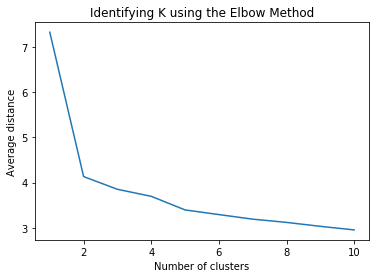

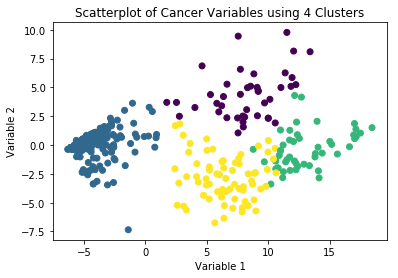

In [5]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans


#Read Csv
df= pd.read_csv(r"C:\Users\Nicho\Desktop\BreastCancerWisconsin.csv", na_values= ["?"])
df= df.apply(pd.to_numeric, errors='coerce')

#Fill in missing values with Mean
df= df.fillna(df.mean())


#Call out the relationship of A10 ; 2 for benign and 4 for malignant
df['A10'] = df['A10'].map({2:0, 4:1})

data_clean = df.fillna(df.mean())

## Simply cleaning the data not utilizing labels since they aren't needed per the phase 2 form
cluster = data_clean[['A2','A3','A4','A5','A6','A7',
'A8','A9','A10']]

#start building the clusters and import the preprocessing model
clustervar= cluster.copy()
from sklearn import preprocessing


clusterCols = ['A2','A3','A4','A5','A6','A7',
'A8','A9','A10']

# Create a for loop to utilize the Cluster Cols field
for col in clusterCols:
    cluster[col] = preprocessing.scale(cluster[col].astype('float64'))
    
#Print the output (describe) again. Mainly to make sure that the new field is working properly
print (clustervar.describe())

clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)

# Utilized to identify the k-means cluster analysis. Specifically looking at the range of 1-10 clusters
from scipy.spatial.distance import cdist
clusters=range(1,11)
meandist=[]


for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) / clus_train.shape[0])
    
##Plotting the average distance from observations from the cluster centroid. Here we are utilizing the Elbow method
##to identify number of clusters to choose. We were told to use 4 in the assignment. The model shows 4 is ideal as well

plt.figure()
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Identifying K using the Elbow Method')
plt.show()

# Interpret 4 clusters for the Solution output
model3= KMeans(n_clusters=4)
model3.fit(clus_train)
clusassign= model3.predict(clus_train)

# plot the 4 clusters
from sklearn.decomposition import PCA
pca_2 = PCA(4)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatterplot of Cancer Variables using 4 Clusters')
plt.show()